In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.Oil_price_analysis import *

In [3]:
analysis = BrentOilAnalysis()

In [4]:
oil_df = analysis.load_data("../data/BrentOilPrices.csv")

c:\Users\Ashis\Desktop\KAIM Program 2\week_10\scripts\Oil_price_analysis.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
clean_df, missing_summary = analysis.clean_data(oil_df)

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [6]:
indicators_df = analysis.calculate_technical_indicators(clean_df)

In [7]:
indicators_df.isnull().sum()

Price          0
Returns        0
Volatility     0
MA_50          0
MA_200         0
Momentum       0
Log_Returns    0
dtype: int64

In [8]:
indicators_df.describe()

,Price,Returns,Volatility,MA_50,MA_200,Momentum,Log_Returns
count,8812.000000,8812.000000,8812.000000,8812.000000,8812.000000,8812.000000,8812.000000
mean,49.106188,0.000536,0.021614,48.890610,48.148658,0.010779,0.000210
std,32.906848,0.025412,0.013280,32.656083,31.591936,0.119324,0.025694
min,9.100000,-0.474654,0.005808,10.412400,11.604650,-0.711338,-0.643699
25%,19.330000,-0.011205,0.015040,19.205250,19.471225,-0.057144,-0.011268
50%,40.920000,0.000476,0.019363,41.330500,41.101025,0.012399,0.000476
75%,70.780000,0.012377,0.024455,70.289700,68.825950,0.072944,0.012301
max,143.950000,0.509868,0.180173,131.993200,114.293000,2.811404,0.412023


In [9]:
analysis.test_stationarity(indicators_df['Price'])

{'ADF Statistic': -2.0170369664542296,
 'p-value': 0.2791533040703691,
 'Critical Values': {'1%': -3.431094843138197,
  '5%': -2.8618691713324633,
  '10%': -2.566945212919472}}

In [10]:
structure_df = analysis.detect_structural_breaks(indicators_df['Price'])

In [11]:
analysis.perform_seasonality_analysis(indicators_df['Price'])

{'Trend': Date
 1988-09-29    15.691167
 1988-09-30    15.709700
 1988-10-03    15.727033
 1988-10-04    15.743417
 1988-10-05    15.760100
                 ...    
 2022-04-04    96.547783
 2022-04-05    96.619900
 2022-04-06    96.689567
 2022-04-07    96.767350
 2022-04-08    96.844150
 Name: trend, Length: 8512, dtype: float64,
 'Seasonal': Date
 1988-03-01   -0.188252
 1988-03-02   -0.215579
 1988-03-03   -0.256991
 1988-03-04   -0.513141
 1988-03-07   -0.497713
                 ...   
 2022-11-08    1.641592
 2022-11-09    2.235875
 2022-11-10    2.006337
 2022-11-11    1.907219
 2022-11-14    2.055564
 Name: seasonal, Length: 8812, dtype: float64,
 'Residual': Date
 1988-09-29    -2.884824
 1988-09-30    -2.932915
 1988-10-03    -3.115070
 1988-10-04    -2.680426
 1988-10-05    -3.266790
                 ...    
 2022-04-04    12.686651
 2022-04-05    11.155393
 2022-04-06     5.358885
 2022-04-07     4.461051
 2022-04-08     5.754171
 Name: resid, Length: 8512, dtype: float64}

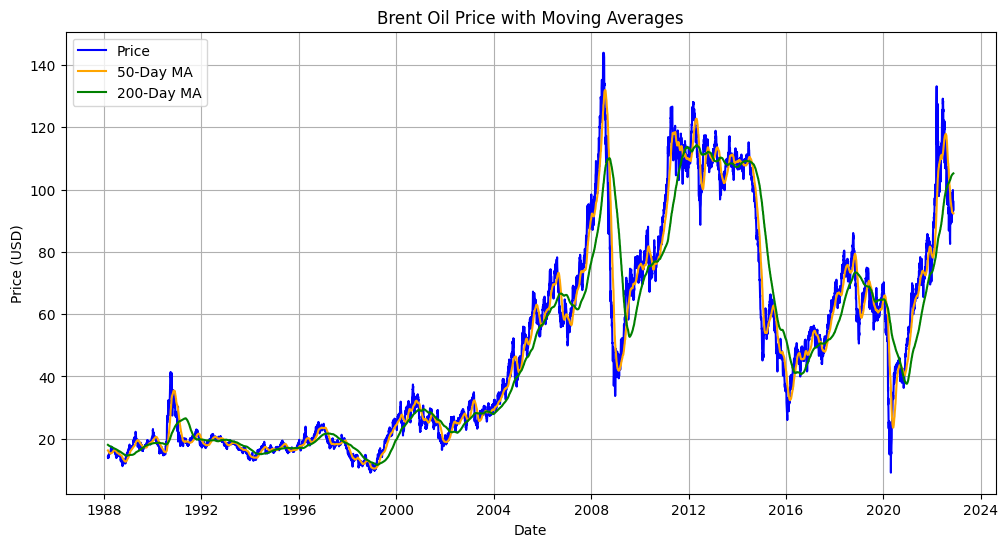

In [12]:
analysis.plot_time_series_with_indicators(clean_df)

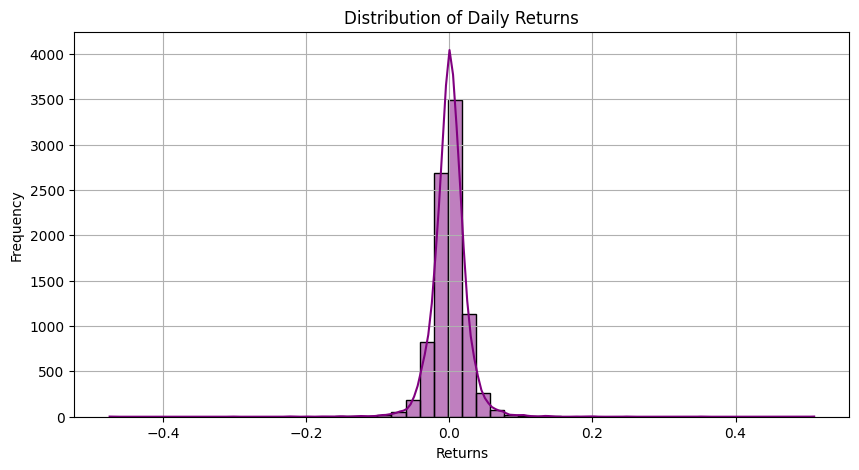

In [13]:
analysis.plot_returns_distribution(clean_df)

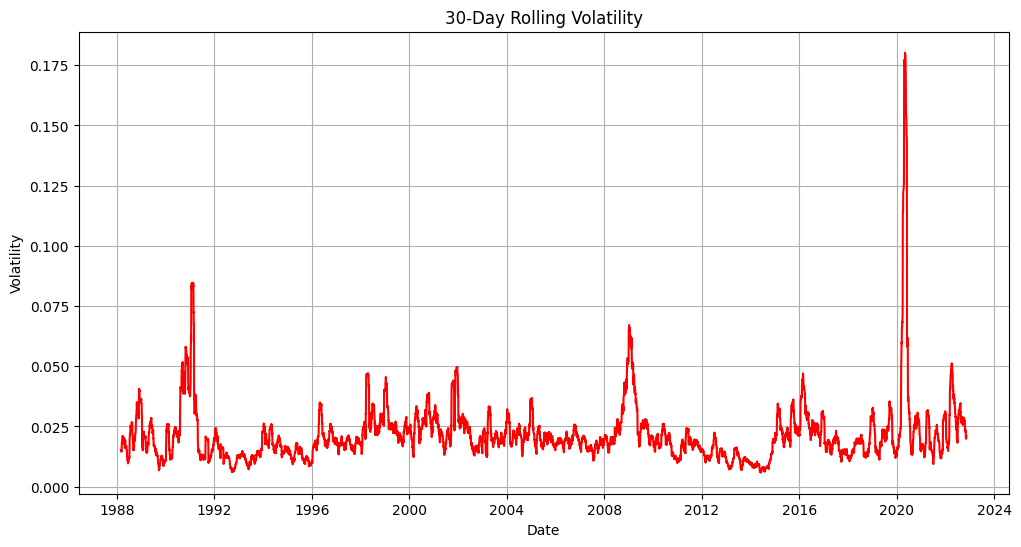

In [14]:
analysis.plot_volatility_over_time(clean_df)

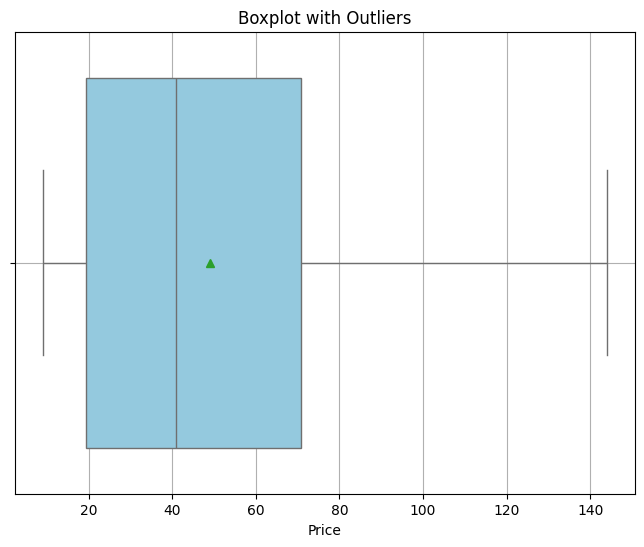

In [15]:
analysis.plot_outliers_with_boxplot(clean_df['Price'])

In [16]:
indicators_df.to_csv("../data/Oil_indicators.csv", index = True)